# Lesson 2 project 2: Higgs decay combinatorics

In [2]:
import numpy as np
import h5py

dataset_hdf5 = h5py.File("../data/SMHiggsToZZTo4L.h5")

This HDF5 file contains Higgs data as arrays, with the particles that are found in the final state of a $H\rightarrow ZZ \rightarrow 4\mathcal{l}$ decay. If you need more physics background you can read [this part](https://github.com/maxgalli/2025-06-15-hsf-india-tutorial-bangalore/blob/main/lesson-1-python/project-higgs.ipynb).
<br>
HDF5 is a file format for arrays, arranged as named objects ("datasets") in directories ("groups").

In [3]:
dataset_hdf5.keys()

<KeysViewHDF5 ['counts', 'ee_mumu', 'events', 'offsets', 'particles']>

In [4]:
list(dataset_hdf5.values())

[<HDF5 dataset "counts": shape (10000,), type "<i4">,
 <HDF5 group "/ee_mumu" (4 members)>,
 <HDF5 group "/events" (8 members)>,
 <HDF5 dataset "offsets": shape (10001,), type "<i4">,
 <HDF5 group "/particles" (20 members)>]

<br><br><br>

In this file,

  * the `events` group contains all of the event-level variables (one scalar per event)
    * run, luminosityBlock, event, PV_x, PV_y, PV_z, MET_pt, MET_phi
  * the `particles` group contains all of the particle-level variables (one scalar per particle)
    * the above, duplicated for each particle
    * pt, phi, eta, mass, pfRelIso03_all, pfRelIso04_all (-1 if electron), dxy, dxyErr, dz, dzErr
    * is_muon is `True` for muons and `False` for electrons
  * the `counts` dataset has the number of particles in each event (one count per event)
  * the `offsets` dataset has a cumulative sum of `counts`

<br><br><br>

In [5]:
pv_x = np.asarray(dataset_hdf5["events"]["PV_x"])
pv_x

array([0.2436988 , 0.24427825, 0.24243677, ..., 0.24536936, 0.24218403,
       0.24438694], shape=(10000,), dtype=float32)

In [6]:
pv_y = np.asarray(dataset_hdf5["events"]["PV_y"])
pv_y

array([0.39369902, 0.39526224, 0.3950969 , ..., 0.39209342, 0.39275196,
       0.39342144], shape=(10000,), dtype=float32)

In [7]:
pv_z = np.asarray(dataset_hdf5["events"]["PV_z"])
pv_z

array([ 1.4513078, -2.879779 ,  1.868263 , ..., -1.7209038, -9.89064  ,
        9.982337 ], shape=(10000,), dtype=float32)

<br><br><br>

### Histogramming

NumPy interactions are usually one operation at a time, rather than one data value at a time. We'll need a way to see what happens to _distributions_ in each step, rather than values.

<br>

The **hist** library provides the same kind of interface for histograms.

In [8]:
import hist

<br>

See the [docs](https://hist.readthedocs.io/en/latest/user-guide/quickstart.html) for how to book and fill histograms.

In [9]:
hist.Hist.new.Regular(100, -0.5, 0.5).Double().fill(pv_x)

Hist(Regular(100, -0.5, 0.5, label='Axis 0'), storage=Double()) # Sum: 10000.0

In [10]:
hist.Hist.new.Regular(100, -0.5, 0.5).Double().fill(pv_y)

Hist(Regular(100, -0.5, 0.5, label='Axis 0'), storage=Double()) # Sum: 10000.0

In [11]:
hist.Hist.new.Regular(100, -0.5, 0.5).Double().fill(pv_z)

Hist(Regular(100, -0.5, 0.5, label='Axis 0'), storage=Double()) # Sum: 687.0 (10000.0 with flow)

<br>

Fill a 3-dimensional histogram, and we'll work with the already-aggregated data.

In [12]:
pv_hist = (
    hist.Hist.new
    .Regular(1000, -0.5, 0.5, name="x")
    .Regular(1000, -0.5, 0.5, name="y")
    .Regular(100, -20.0, 20.0, name="z")
    .Double()
    .fill(x=pv_x, y=pv_y, z=pv_z)
)
pv_hist

Hist(
  Regular(1000, -0.5, 0.5, name='x'),
  Regular(1000, -0.5, 0.5, name='y'),
  Regular(100, -20, 20, name='z'),
  storage=Double()) # Sum: 9986.0 (10000.0 with flow)

<br>

hist has a [slicing syntax](https://uhi.readthedocs.io/en/latest/indexing.html) similar to NumPy arrays, with some extensions.

Plot $x$ versus $y$ by summing over $z$ (see [plotting docs](https://hist.readthedocs.io/en/latest/user-guide/notebooks/Plots.html)):

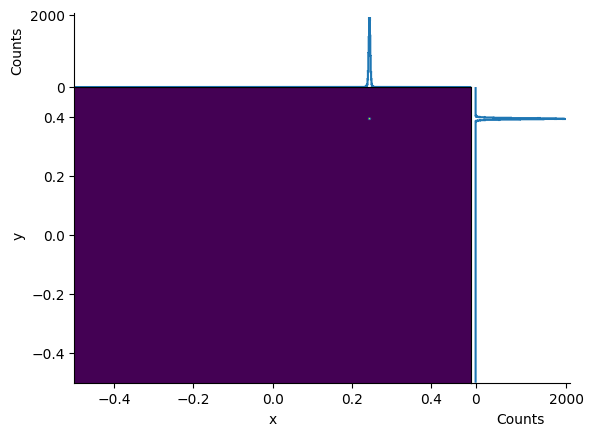

In [15]:
pv_hist[:, :, ::sum].plot2d_full();

<br>

That's a tight beamspot; let's zoom in.

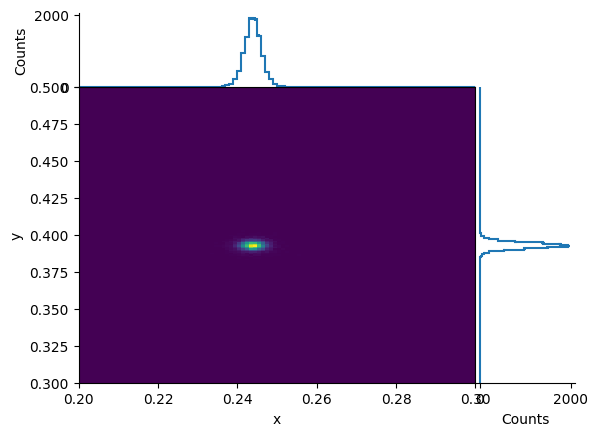

In [16]:
from hist import loc

pv_hist[loc(0.2):loc(0.3), loc(0.3):loc(0.5), ::sum].plot2d_full();

<br>

This cuts around the beamspot in $x$ and $y$ and plots $z$.

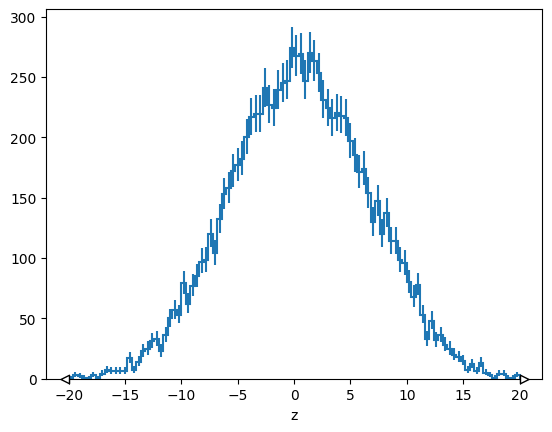

In [17]:
pv_hist[loc(0.2):loc(0.3):sum, loc(0.3):loc(0.5):sum, :].plot();

<br><br><br>

Histograms with many bins or many dimensions use a lot of memory, so it helps to clean up when finished.

In [18]:
del pv_hist

<br><br><br>

### Analysis with an $ee\mu\mu$ sample

One of the decay modes of Higgs → ZZ is ZZ → 2 electrons + 2 muons.

<br>

<center>
<img src="../img/higgs-to-four-leptons-diagram.png" width="500px">
</center>

<br>

The HDF5 file contains another group with events that have exactly 2 electrons and 2 muons.

In [19]:
dataset_hdf5["ee_mumu"]["e1"]

<HDF5 group "/ee_mumu/e1" (18 members)>

In [20]:
dataset_hdf5["ee_mumu"]["e2"]

<HDF5 group "/ee_mumu/e2" (18 members)>

In [21]:
dataset_hdf5["ee_mumu"]["mu1"]

<HDF5 group "/ee_mumu/mu1" (19 members)>

In [22]:
dataset_hdf5["ee_mumu"]["mu2"]

<HDF5 group "/ee_mumu/mu2" (19 members)>

In [23]:
list(dataset_hdf5["ee_mumu"]["mu2"].values())

[<HDF5 dataset "MET_phi": shape (30868,), type "<f4">,
 <HDF5 dataset "MET_pt": shape (30868,), type "<f4">,
 <HDF5 dataset "PV_x": shape (30868,), type "<f4">,
 <HDF5 dataset "PV_y": shape (30868,), type "<f4">,
 <HDF5 dataset "PV_z": shape (30868,), type "<f4">,
 <HDF5 dataset "charge": shape (30868,), type "<i4">,
 <HDF5 dataset "dxy": shape (30868,), type "<f4">,
 <HDF5 dataset "dxyErr": shape (30868,), type "<f4">,
 <HDF5 dataset "dz": shape (30868,), type "<f4">,
 <HDF5 dataset "dzErr": shape (30868,), type "<f4">,
 <HDF5 dataset "eta": shape (30868,), type "<f4">,
 <HDF5 dataset "event": shape (30868,), type "<u8">,
 <HDF5 dataset "luminosityBlock": shape (30868,), type "<i8">,
 <HDF5 dataset "mass": shape (30868,), type "<f4">,
 <HDF5 dataset "pfRelIso03_all": shape (30868,), type "<f4">,
 <HDF5 dataset "pfRelIso04_all": shape (30868,), type "<f4">,
 <HDF5 dataset "phi": shape (30868,), type "<f4">,
 <HDF5 dataset "pt": shape (30868,), type "<f4">,
 <HDF5 dataset "run": shape (

<br>

The datasets in all four of these nested groups correspond to 30868 $ee\mu\mu$ events (drawn from a larger dataset than the JSON).

Index `i` in every array corresponds to the same event `i`.

In [24]:
dataset_hdf5["ee_mumu"]["e1"]["pt"][0]

np.float32(5.4658875)

In [25]:
dataset_hdf5["ee_mumu"]["e2"]["pt"][0]

np.float32(6.2657995)

In [26]:
dataset_hdf5["ee_mumu"]["mu1"]["pt"][0]

np.float32(39.615726)

In [27]:
dataset_hdf5["ee_mumu"]["mu2"]["pt"][0]

np.float32(3.6974976)

<br><br><br>

### Coordinate transformations

In [28]:
import vector

<br>

We can use the **vector** library because it also performs coordinate transformations on arrays (see [docs](https://vector.readthedocs.io/en/latest/usage/intro.html#NumPy-arrays-of-vectors)).

In [29]:
e1 = vector.array({
    "pt": dataset_hdf5["ee_mumu"]["e1"]["pt"],
    "phi": dataset_hdf5["ee_mumu"]["e1"]["phi"],
    "eta": dataset_hdf5["ee_mumu"]["e1"]["eta"],
    "mass": dataset_hdf5["ee_mumu"]["e1"]["mass"],
})

In [30]:
e1.px

array([  0.89284647, -14.884417  ,  38.424294  , ...,  25.543156  ,
        26.030003  ,  17.343699  ], shape=(30868,), dtype=float32)

In [31]:
e1.py

array([ -5.392472,  36.53877 , -28.779644, ..., -13.838857, -13.777791,
        -8.069776], shape=(30868,), dtype=float32)

In [32]:
e1.pz

array([ 14.102889,  12.723335, 165.00693 , ...,  50.535534, -31.560045,
        26.412724], shape=(30868,), dtype=float32)

<br>

In [33]:
e2 = vector.array({
    "pt": dataset_hdf5["ee_mumu"]["e2"]["pt"],
    "phi": dataset_hdf5["ee_mumu"]["e2"]["phi"],
    "eta": dataset_hdf5["ee_mumu"]["e2"]["eta"],
    "mass": dataset_hdf5["ee_mumu"]["e2"]["mass"],
})
mu1 = vector.array({
    "pt": dataset_hdf5["ee_mumu"]["mu1"]["pt"],
    "phi": dataset_hdf5["ee_mumu"]["mu1"]["phi"],
    "eta": dataset_hdf5["ee_mumu"]["mu1"]["eta"],
    "mass": dataset_hdf5["ee_mumu"]["mu1"]["mass"],
})
mu2 = vector.array({
    "pt": dataset_hdf5["ee_mumu"]["mu2"]["pt"],
    "phi": dataset_hdf5["ee_mumu"]["mu2"]["phi"],
    "eta": dataset_hdf5["ee_mumu"]["mu2"]["eta"],
    "mass": dataset_hdf5["ee_mumu"]["mu2"]["mass"],
})

<br>

Mass of the $Z$ boson constructed from $ee$:

In [34]:
zmass_ee = (e1 + e2).mass
zmass_ee

array([21.73193 , 89.20303 , 90.2857  , ..., 42.418484, 91.836815,
       27.277544], shape=(30868,), dtype=float32)

<br>

Mass of the $Z$ boson constructed from $\mu\mu$:

In [35]:
zmass_mumu = (mu1 + mu2).mass
zmass_mumu

array([ 4.5936437, 27.516134 , 22.878841 , ..., 75.887665 ,  0.7616286,
       90.034966 ], shape=(30868,), dtype=float32)

<br><br><br><br><br>

## Exercise part 1

Plot `zmass_mumu` versus `zmass_ee`. It should look like this (60 bins×60 bins):

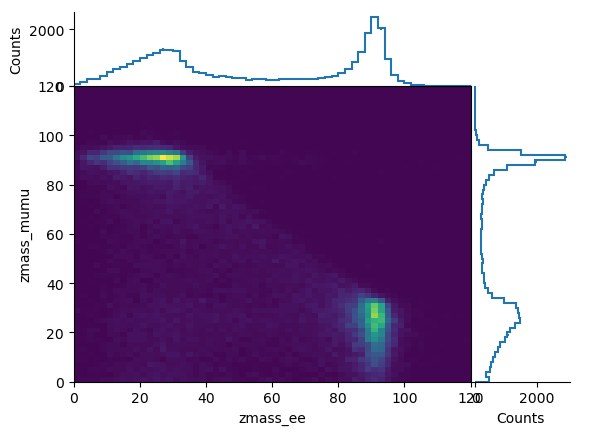

**ANSWER HERE:**

In [112]:
zmass_boson=(e1+e2+mu1+mu2).mass

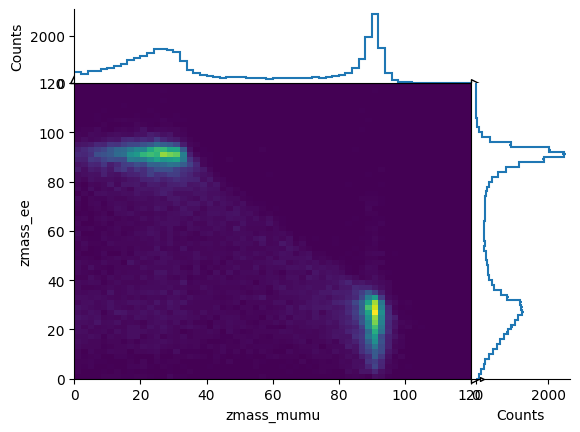

In [136]:
zmass_hist = (
    hist.Hist.new
    .Regular(60, 0, 120, name = 'zmass_mumu')
    .Regular(60, 0, 120, name = 'zmass_ee')
    .Regular(1000, 0, 2000, name = 'zmass_boson')
    .Double()
    .fill(zmass_ee=zmass_ee, zmass_mumu=zmass_mumu, zmass_boson=zmass_boson)
)
zmass_hist[:, :, ::sum].plot2d_full();

<br><br><br><br><br>

## Exercise part 2

Plot the Higgs mass. It should look like this (100 bins):

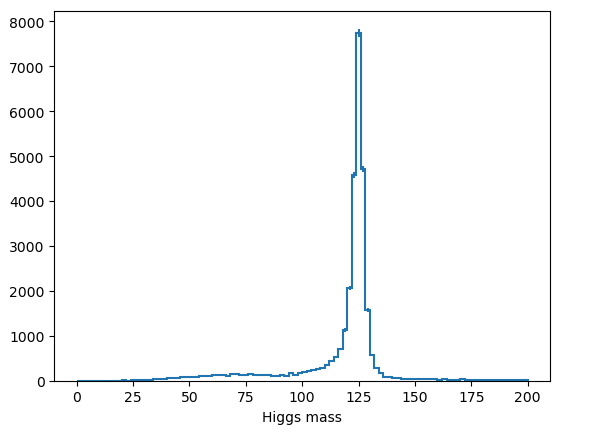

**ANSWER HERE:**

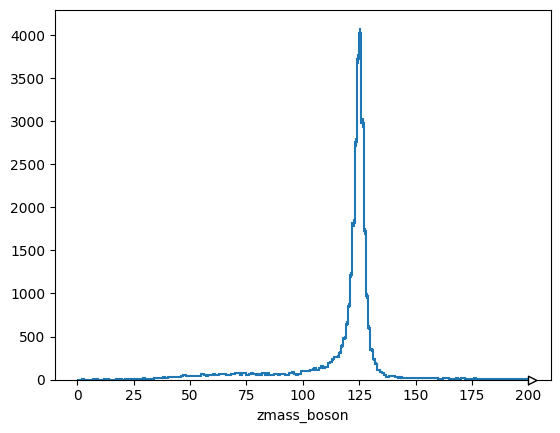

In [117]:
zmass_hist[::sum, ::sum, :200j].plot();

<br><br><br>

### Charge quality cut

In the next part of the exercise, you'll apply quality cuts.

**First quality cut:** The two electrons are $e^+$ and $e^-$ and the two muons are $\mu^+$ and $\mu^-$.

<br>

Get the particle charges as arrays:

In [118]:
e1_charge = np.asarray(dataset_hdf5["ee_mumu"]["e1"]["charge"])
e2_charge = np.asarray(dataset_hdf5["ee_mumu"]["e2"]["charge"])
mu1_charge = np.asarray(dataset_hdf5["ee_mumu"]["mu1"]["charge"])
mu2_charge = np.asarray(dataset_hdf5["ee_mumu"]["mu2"]["charge"])

<br>

Let's look at the distribution of charges in a 5 bin×5 bin histogram.

In [119]:
charge_hist = hist.Hist.new.Integer(-2, 3, name="q_ee").Integer(-2, 3, name="q_mumu").Double().fill(
    q_ee=e1_charge + e2_charge,
    q_mumu=mu1_charge + mu2_charge,
)
charge_hist

Hist(
  Integer(-2, 3, name='q_ee'),
  Integer(-2, 3, name='q_mumu'),
  storage=Double()) # Sum: 30868.0

<br>

Most of the distribution is at `e1_charge + e2_charge == 0` and `mu1_charge + mu2_charge == 0` (high quality Higgs events).

We can ask the histogram for its bin data as an array:

In [120]:
charge_hist.values()

array([[   47.,     0.,  1126.,     0.,    72.],
       [    0.,     0.,     0.,     0.,     0.],
       [  516.,     0., 27496.,     0.,   499.],
       [    0.,     0.,     0.,     0.,     0.],
       [   66.,     0.,  1002.,     0.,    44.]])

Why is it distributed like that?

<br>

We can also use Matplotlib to make overlays of cross-sections that do not include the central peak.

In [121]:
import matplotlib.pyplot as plt

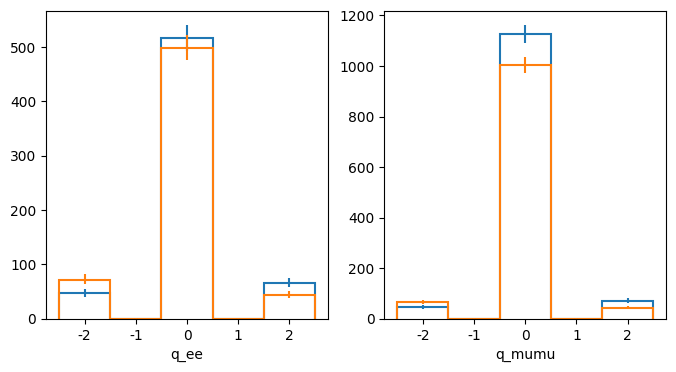

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

charge_hist[:, 0].plot(ax=ax1);
charge_hist[:, 4].plot(ax=ax1);
charge_hist[0, :].plot(ax=ax2);
charge_hist[4, :].plot(ax=ax2);

<br>

To select events with `e1_charge + e2_charge == 0` and `mu1_charge + mu2_charge == 0`, we can make each expression into a boolean array,

In [123]:
e1_charge + e2_charge == 0

array([ True,  True,  True, ...,  True,  True,  True], shape=(30868,))

and apply it as a slice.

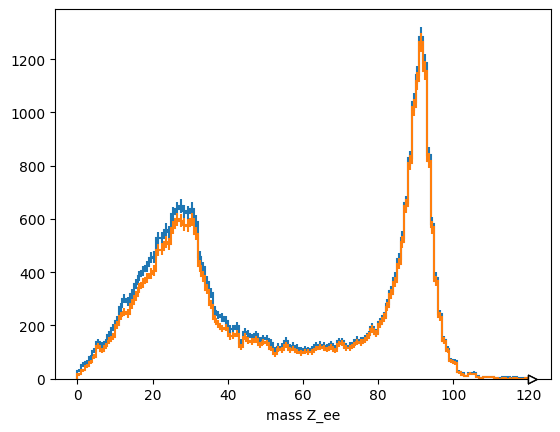

In [124]:
fix, ax = plt.subplots(1, 1)

hist.Hist.new.Regular(120, 0, 120, name="mass Z_ee").Double().fill(
    zmass_ee
).plot(ax=ax);

hist.Hist.new.Regular(120, 0, 120, name="mass Z_ee").Double().fill(
    zmass_ee[e1_charge + e2_charge == 0]
).plot(ax=ax);

<br>

But how do you apply both?

Unfortunately, you have to use `&` for "and", `|` for "or", `~` for "not".

This is unfortunate because the comparison operation (`==`, `!=`, `<`, `>`, `<=`, `>=`) has to be surrounded by parentheses for the right order of operations.

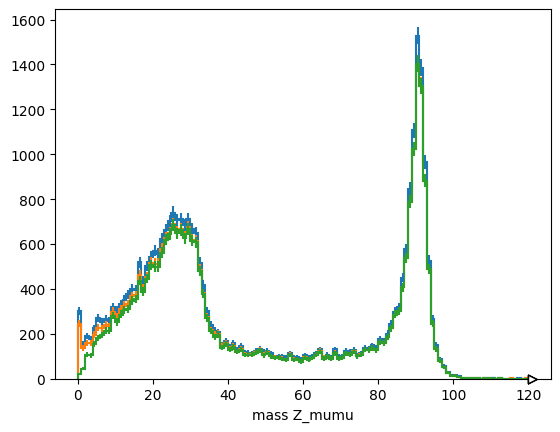

In [125]:
fix, ax = plt.subplots(1, 1)

hist.Hist.new.Regular(120, 0, 120, name="mass Z_mumu").Double().fill(
    zmass_mumu
).plot(ax=ax);

hist.Hist.new.Regular(120, 0, 120, name="mass Z_mumu").Double().fill(
    zmass_mumu[e1_charge + e2_charge == 0]
).plot(ax=ax);

hist.Hist.new.Regular(120, 0, 120, name="mass Z_mumu").Double().fill(
    zmass_mumu[(e1_charge + e2_charge == 0) & (mu1_charge + mu2_charge == 0)]
).plot(ax=ax);

<br><br><br><br><br>

## Exercise part 3

Since most of the data would pass the charge cut, the difference that it makes to the final Higgs mass plot is barely perceptible. Instead, draw the Higgs mass with only those events that _fail_ the charge quality cut.

It should look like this (100 bins):

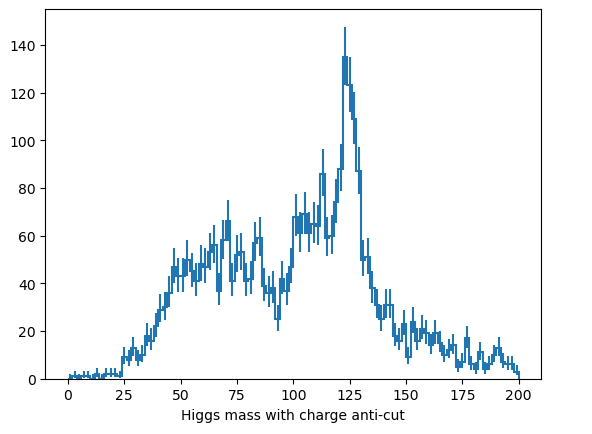

**ANSWER HERE:**

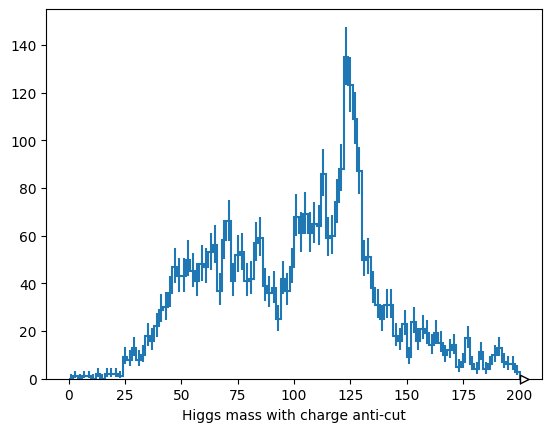

In [126]:
fix, ax = plt.subplots(1, 1)

hist.Hist.new.Regular(100, 0, 200, name="Higgs mass with charge anti-cut").Double().fill(
    (zmass_boson)[~((e1_charge + e2_charge == 0) & (mu1_charge + mu2_charge == 0))]
).plot(ax=ax);

<br><br><br>

### Z mass quality cut

**Second quality cut:**

  * 12 GeV/$c^2$ < smallest Z mass < 120 GeV/$c^2$
  * 40 GeV/$c^2$ < largest Z mass < 120 GeV/$c^2$

Now that you have

In [67]:
zmass_ee

array([21.73193 , 89.20303 , 90.2857  , ..., 42.418484, 91.836815,
       27.277544], shape=(30868,), dtype=float32)

In [68]:
zmass_mumu

array([ 4.5936437, 27.516134 , 22.878841 , ..., 75.887665 ,  0.7616286,
       90.034966 ], shape=(30868,), dtype=float32)

it would be relatively straightforward to apply selections to the $Z \to ee$ and $Z \to \mu\mu$, but we need to apply selections to `zmass_small` and `zmass_big`.

<br><br><br><br><br>

## Exercise part 4

Define `zmass_small` and `zmass_big` and plot them. There are several ways to do that.

It should look like this (60 bins×60 bins):

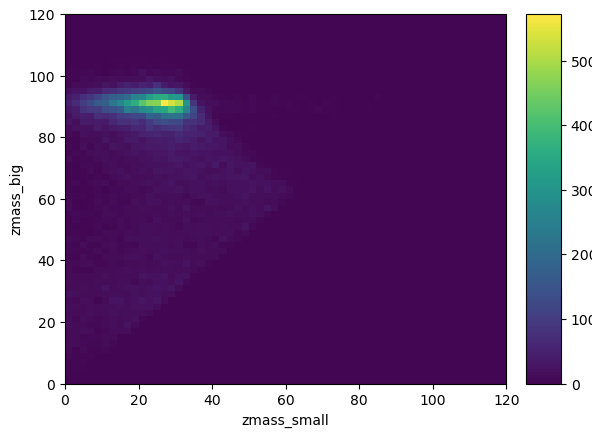

**ANSWER HERE:**

In [102]:
zmass_small = np.empty(zmass_mumu.size)
zmass_small[zmass_ee < zmass_mumu] = zmass_ee[zmass_ee < zmass_mumu]
zmass_small[zmass_ee > zmass_mumu] = zmass_mumu[zmass_ee > zmass_mumu]
small_cut = (12 < zmass_small) & (120 > zmass_small)

zmass_big = np.empty(zmass_mumu.size)
zmass_big[zmass_ee < zmass_mumu] = zmass_mumu[zmass_ee < zmass_mumu]
zmass_big[zmass_ee > zmass_mumu] = zmass_ee[zmass_ee > zmass_mumu]
big_cut = (40 < zmass_big) & (120 > zmass_big)

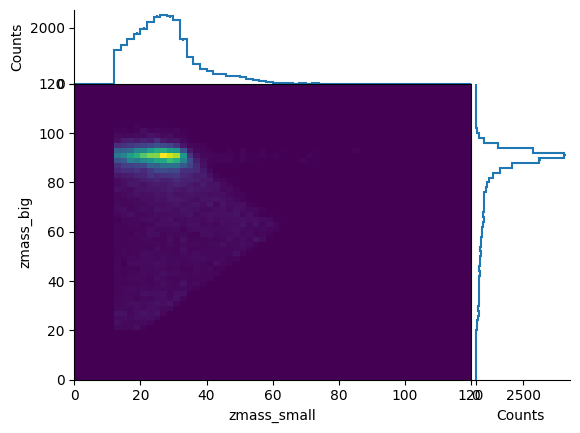

In [128]:
zmass_hist = (
    hist.Hist.new
    .Regular(60, 0, 120, name = 'zmass_small')
    .Regular(60, 0, 120, name = 'zmass_big')
    .Regular(1000, 0, 1000, name = 'zmass_boson')
    .Double()
    .fill(zmass_small=zmass_small[small_cut & big_cut], zmass_big=zmass_big[small_cut & big_cut], zmass_boson=(zmass_boson)[small_cut & big_cut])
)
zmass_hist[:, :, ::sum].plot2d_full();

<details>
    <summary><b>Hint 1...</b></summary>

<br>

You could use [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

</details>

<br>

<details>
    <summary><b>Hint 2...</b></summary>

<br>

You could also define `zmass_small` and `zmass_big` as empty arrays and fill them like:

```python
zmass_small[zmass_ee < zmass_mumu] = zmass_ee
zmass_small[zmass_mumu < zmass_ee] = zmass_mumu
```

</details>

<br><br><br><br><br>

## Exercise part 5

Make a final Higgs plot with and without the Z mass quality cut. It should look like this (100 bins):

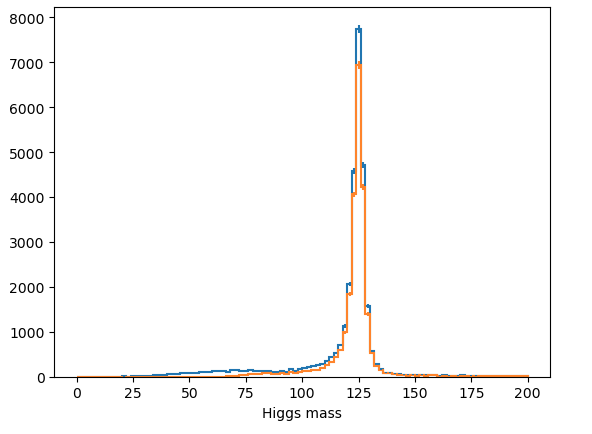

**ANSWER HERE:**

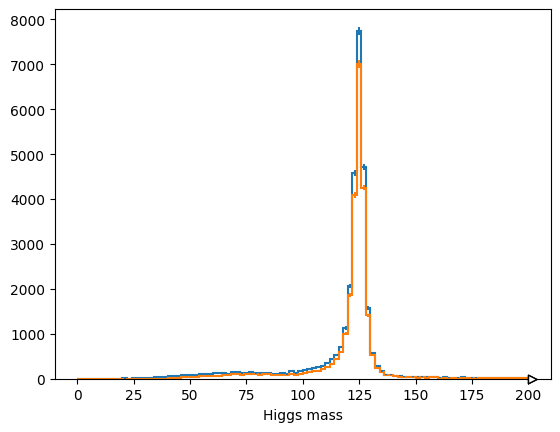

In [129]:
fix, ax = plt.subplots(1, 1)

hist.Hist.new.Regular(100, 0, 200, name="Higgs mass").Double().fill(
    zmass_boson
).plot(ax=ax);


hist.Hist.new.Regular(100, 0, 200, name="Higgs mass").Double().fill(
    (zmass_boson)[small_cut & big_cut]
).plot(ax=ax);


<br><br><br><br><br>

For fun, you can also make the anti-cut plot. It should look like this (100 bins):

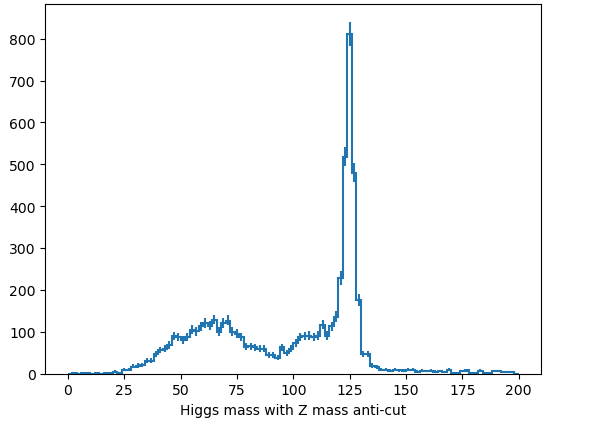

**ANSWER HERE:**

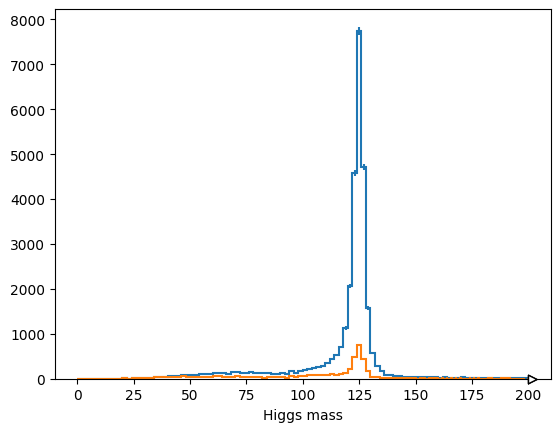

In [131]:
fix, ax = plt.subplots(1, 1)

hist.Hist.new.Regular(100, 0, 200, name="Higgs mass").Double().fill(
    zmass_boson
).plot(ax=ax);


hist.Hist.new.Regular(100, 0, 200, name="Higgs mass").Double().fill(
    (zmass_boson)[~(small_cut & big_cut)]
).plot(ax=ax);
